In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib

In [56]:
warnings.filterwarnings("ignore")

In [57]:
# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [58]:
# Check for missing values
print("Missing Values in Dataset:\n",data.isnull().sum())

Missing Values in Dataset:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [59]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [60]:
data['Sleep Disorder'].fillna('None', inplace=True)

In [61]:
# Split Blood Pressure
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop(columns=['Blood Pressure'], inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic BP              374 non-null    int32  
 13  Diastolic BP             374 non-null    int32  
dtypes: float64(1), int32(2), i

In [64]:
# Save to Excel for Power BI
excel_file = "sleep_disorder_dashboard_data.xlsx"
data.to_excel(excel_file, index=False)

In [65]:
# Encode categorical variables
le = LabelEncoder()
columns = ['Gender','Occupation','Quality of Sleep', 'Physical Activity Level','Stress Level', 'BMI Category','Sleep Disorder']
for col in columns:
    data[col] = le.fit_transform(data[col])

In [66]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,2,4,3,3,77,4200,1,126,83
1,2,1,28,1,6.2,2,9,5,0,75,10000,1,125,80
2,3,1,28,1,6.2,2,9,5,0,75,10000,1,125,80
3,4,1,28,6,5.9,0,0,5,2,85,3000,2,140,90
4,5,1,28,6,5.9,0,0,5,2,85,3000,2,140,90


In [67]:
# Confirm changes
print("\nUpdated Dataset Info:\n")
data.info()


Updated Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int32  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int32  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int32  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
 12  Systolic BP              374 non-null    int32  
 13  Diastolic BP             374 non-null    int32  
dtypes:

In [68]:
# Split features and target
X = data.drop(columns=['Person ID', 'Sleep Disorder'])
y = data['Sleep Disorder']

In [69]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance:

                    Feature  Importance
7              BMI Category    0.171773
11             Diastolic BP    0.155713
10              Systolic BP    0.153752
2                Occupation    0.109795
3            Sleep Duration    0.093992
1                       Age    0.090871
5   Physical Activity Level    0.075859
9               Daily Steps    0.057726
8                Heart Rate    0.032636
6              Stress Level    0.030016
4          Quality of Sleep    0.023268
0                    Gender    0.004599


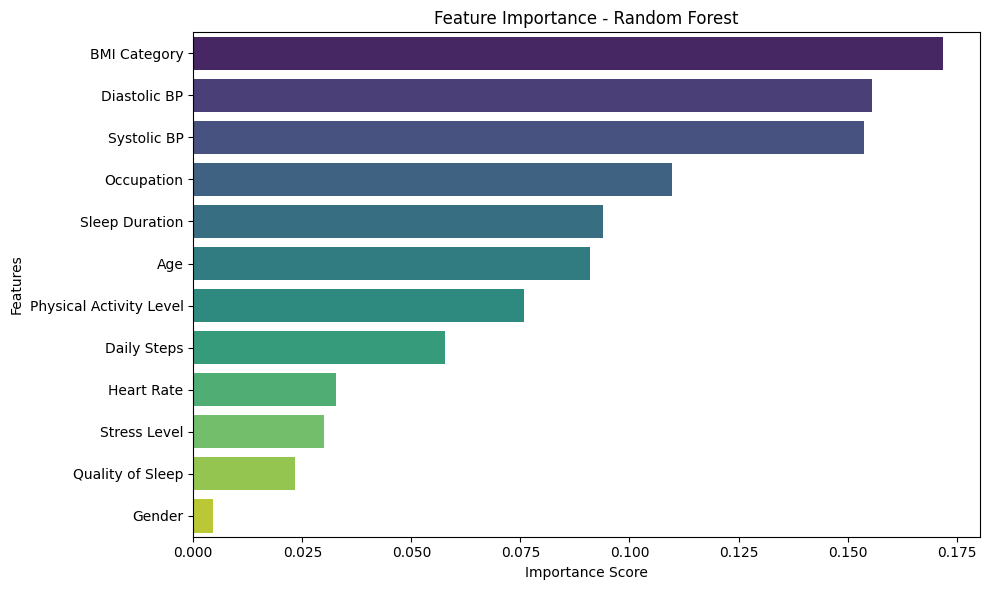

In [72]:
# Feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:\n")
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [73]:
# Evaluate Decision Tree
class_names = ['Insomnia','Sleep Apnea', 'None']
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt,target_names=class_names))

Decision Tree Performance:
Accuracy: 0.8933333333333333
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.76      0.81      0.79        16
 Sleep Apnea       0.95      0.98      0.97        43
        None       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



In [74]:
# Evaluate Random Forest
class_names = ['Insomnia','Sleep Apnea', 'None']
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf,target_names=class_names))


Random Forest Performance:
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
 Sleep Apnea       0.95      0.98      0.97        43
        None       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



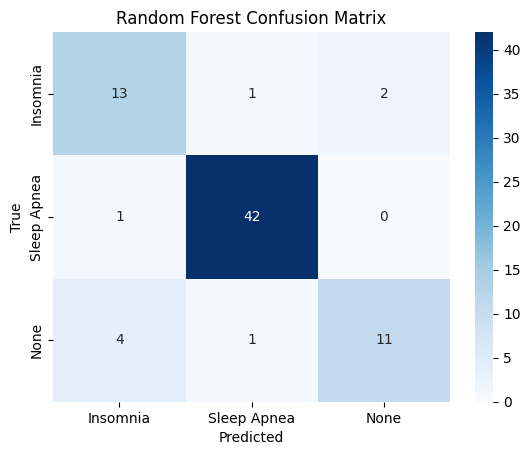

In [75]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
# Save the trained model using joblib
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']